In [80]:
# For two time series define a metric distance function so that be stable to synchronous
# variations of the time series in time, but emphasises asynchronous ones.
# Use a modification of the Hausdorff metric. Slide both time series with kernel window and find the maximum weighted difference.

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.linalg import lstsq
# Import the local functions, plots, and utilities
from functions import scale_complex_x, scale_separate_x #find_shiftX_exhaust, shift, scale_complex
# from functions import gen_base, get_clusters, shift_x, is_incluster
from plots import plt_compare_vec # plt_clust_Xy, plt_clust_Xyy

# Read the data flies and import functions
f_path = '/Users/victor/PycharmProjects/Signal-separation/'
f_prefix = '/data/inphase_quadrature_'
# Convert to the complex row vectors
with open(f_path + f_prefix + 'data.json') as f:
    iqdata = np.array(json.load(f))
    iqdata = iqdata[:, 0, :] + 1j * iqdata[:, 1, :]

0.9999999999999999


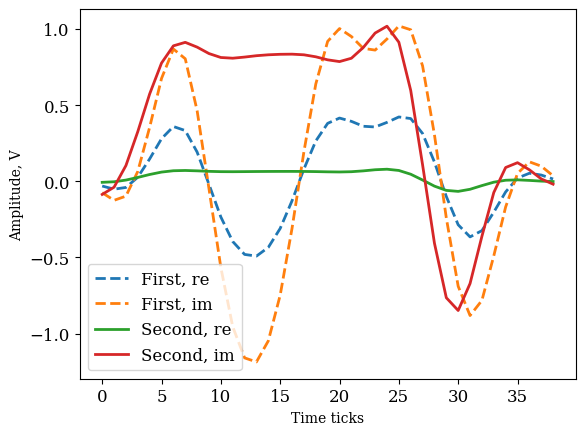

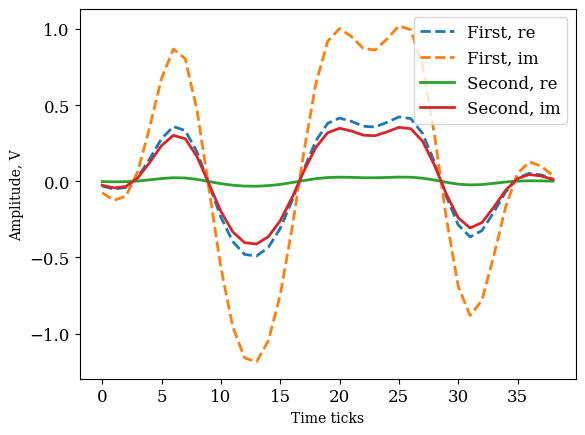

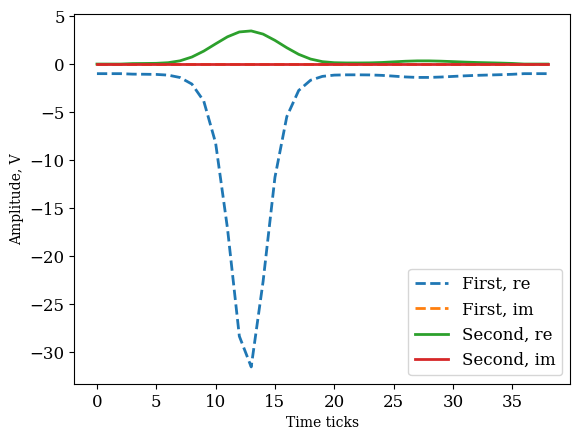

In [95]:
coeff = 1
x = iqdata[10]
#x = scale_separate_x(x, coeff)
y = iqdata[20]
#y = scale_separate_x(y, coeff)

X = np.column_stack([x])
b, err, rank, s = lstsq(X, y)
y1 = X @ b

def max_weighted_distance(x, y, kernel = None):
    # The two vectors are complex-valued
    if not kernel:
        # ker_Epanechnikov = [0.75, 0.9375, 1., 0.9375, 0.75]
        ker_Gaussian = [0.60, 0.77, 1., 0.77, 0.60]
        ker_Alternative = [0.33, 0.60, 0.77, 1., 0.77, 0.60, 0.33]
        ker = ker_Gaussian
        ker = ker_Alternative
        ker = ker / np.sum(ker)
        print(np.sum(ker))

    z = np.zeros(len(x))
    w2 = int(np.floor(len(ker)/2))
    for i in range(w2, len(x) - w2):
        # sum of  weighted squares
        z[i] = np.sum(np.abs(ker * (x[i-w2:i+w2+1] - y[i-w2:i+w2+1])**2))
    dist = max(z)
    return dist, z

dist, z = max_weighted_distance(x, y)
zz = -1 * np.exp(z)

plt_compare_vec(x, y)
plt_compare_vec(x, y1)
plt_compare_vec(zz, z)

In [53]:
z = np.zeros(len(x))

In [54]:
print(z)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [88]:
x = np.array([1+1j, 2+2j, 3+3j, 4+4j, 5+5j])

In [89]:
x * 2

array([ 2. +2.j,  4. +4.j,  6. +6.j,  8. +8.j, 10.+10.j])